# IN3050/4050 - Week 10: Deep Learning Glimpse

## Deep Learning
Deep learning is a big topic, and we can't hope to cover it in any depth here. But, as an introduction we are going to take a look at some state of the art tools used in both research and industry.

We are also going to take a look at one of the biggest problems with deep models, the vanishing gradient problem.

### Imports used in the rest of the notebook

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Part 1) Introduction to TensorFlow 2.0
TensorFlow is a machine learning framework designed specifically for neural networks, but can be used for all sorts of computations. TensorFlow have highly optimized and accelerated code for most of the operations needed to make state of the art neural networks.

In this course we will only be using TensorFlow but there exists many other deep learning frameworks, e.g. [PyTorch](https://pytorch.org/), [MXNet](https://mxnet.apache.org/), [Caffe](https://caffe.berkeleyvision.org/), and many more.

This [tf tutorial](https://www.tensorflow.org/tutorials/customization/basics) is a useful reference while completing this exercise.

**Note:** It's important to use TensorFlow 2.0 or later for these exercises as they make frequent use of eager execution.

### Simple operations/tensors

#### Tensors
In TensorFlow the basic object is a tensor. Tensors work much like numpy arrays, but have a different/stricter syntax. A tensor can be made from a numpy array, and can be cast to a numpy array.

In [2]:
x = tf.constant(np.arange(1, 10).reshape((3, 3)))
print("Original tensor:")
print(x)

print("\nConverted to array:")
print(x.numpy())
print(type(x.numpy()))

Original tensor:
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)

Converted to array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>


#### Operations
TensorFlow also comes with all of the standard math operations. Again, these look very similar to the ones found in numpy. At this point you might wonder why use tensors when they are so similar to numpy arrays. Later in this assignment we are going to use some of the cool features of TensorFlow tensors that numpy arrays don't have.

#### tf.constant vs. tf.Variable
In TensorFlow we have two different kind of values. Constants, that are supposed to stay constant, and Variables that may change during calculations.

**Constants:**
- Initialized with a specific value.

e.g `x = tf.constant(3, dtype=int)`
- Not meant to change during runtime.

**Variables:**
- Initialized with a value OR an operation/function. e.g:

In [3]:
x_init = tf.random_uniform_initializer(minval=-1, maxval=1, seed=100) # Initializer from the TensorFlow package.

x = tf.Variable(initial_value=x_init(shape=(1, 2), dtype='float32')) # A tf.variable

- May change during runtime by using the `.assign()` or `assign_add()` methods.

There are other differences we will see later.

#### Exercise 1.1)
Use TensorFlow tensors to do the following:

1. Create two constants x, and y with the values, 3 and 7.
2. Multiply the values and assign the result to `z`.
3. Create a variable matrix `A` with the shape $3 \times 3$ and a column vector `b` with 3 elements using the `x_init()` initializer.
4. Multiply the matrix and the vector together and assign the result to `c`.
5. Create a numpy column vector of shape (3, 1) with the values [1, 2, 3] and add these elementwise to `b`.

In [4]:
# 1)
x = tf.constant(3)
y = tf.constant(7)

# 2)
z = x*y

# 3)
A = tf.Variable(x_init(shape=(3, 3)))
b = tf.Variable(x_init(shape=(3, 1)))

# 4)
c = tf.matmul(A, b)

# 5) Update b with new values:
d = np.array([[1], [2], [3]])

b.assign_add(d)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[0.46007943],
       [1.523005  ],
       [2.3315449 ]], dtype=float32)>

#### Exercise 1.2) Activation function
Implement the sigmoid activation function and its derivative using TensorFlow. The exponential function is available as `tf.exp(x)`.

Activation:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Gradient:
$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$

In [5]:
def my_sigmoid(x):
    """
    Return sigmoid activation of x.
    
    Parameters
    ----------
    x : tf.Tensor
        Tensor to calculate activations for.
    
    Returns
    -------
    a : tf.Tensor
        The activations.
    """
    a = 1./(1 + tf.exp(-x))
    return a

def my_sigmoid_grad(a):
    """
    Returns the gradient of the sigmoid function from the value of the activation.
    
    Parameters
    ----------
    a : tf.Tensor
        Output from my_sigmoid().
    
    Returns
    -------
    grad : tf.Tensor
        Gradient of the sigmoid function.
    """
    grad = a*(1 - a)
    return grad

We can of course plot the values in TensorFlow tensors.

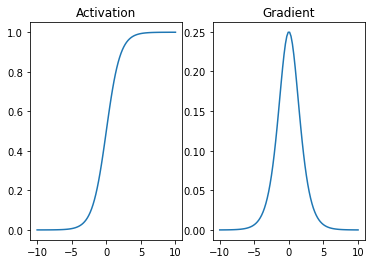

In [6]:
x = tf.constant(np.linspace(-10, 10, 100))
a = my_sigmoid(x)
grad = my_sigmoid_grad(a)


fig, ax = plt.subplots(1, 2)
ax[0].plot(x, a); ax[0].set_title("Activation")
ax[1].plot(x, grad); ax[1].set_title("Gradient");

### Gradient Tape
TensorFlow comes with its own automatic differentiation module called gradient tape. Using gradient tape allows us to get the gradient of a series of TensorFlow operations without doing any manual differentiation. TensorFlow is not the only framework that has this feature, e.g. PyTorch's Autograd.

#### Exercise 1.3)
Evaluate your function `my_sigmoid()` in all the points of the tensor `x` in the cell below, and use `tf.GradientTape()` to calculate the gradient of the function in these points. You can look at [this](https://www.tensorflow.org/tutorials/customization/autodiff) page for help.

Compare to your own implementation of the gradient.

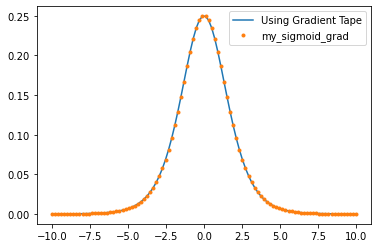

In [7]:
x = tf.constant(np.linspace(-10, 10, 100))

with tf.GradientTape() as t:
    t.watch(x)
    a = my_sigmoid(x)

# Gradient from GradientTape():
grad_tape = t.gradient(a, x)

# Gradient from your own function:
grad = my_sigmoid_grad(a)


# Plot of the gradient from tf.GradientTape() and my_sigmoid_grad().
fig, ax = plt.subplots(1, 1)
ax.plot(x, grad_tape, label="Using Gradient Tape")
ax.plot(x, grad, '.', label="my_sigmoid_grad")
ax.legend()

If you did everything correctly the dots should be on top of the line.

### Layers
TensorFlow comes with many implementations of functions useful to machine learning. The Keras module, `tf.keras`, is a higher lever API that allows you to very quickly and easily create complex models without needing to worry about all the minor details.

#### Keras Sequential Model
There are very few limits on what you can do with the Keras module, but to keep it simple we will restrict our models to "sequential" models. This means that the layers are all stacked on top each other and there are no loops, skip connections or forks. One layer feeds in to the next. These types of models are very easy to define using the Keras API.

Below we define a simple network with an input layer of size 4,  two hidden layers of size 2 and a output layer of only one node. All the layers use a simple sigmoid activation function except the last one, where we skip the activation. Notice that we specify an initializer for our weights.

![Model structure](figures/4_nn.png)

In [8]:
model = tf.keras.Sequential()

# The input_shape argument is a tuple with the last element empty.
# This tells tensorflow that it can recieve any number of entries in this dimension.
# That way we can train over batches of varying sizes later.
model.add(tf.keras.layers.Dense(2, input_shape=(4,),
                                activation=tf.keras.activations.sigmoid,
                                kernel_initializer=x_init)) # We add the x_init initializer for our weights.

# No need to define input sizes to the next layers. These sizes are infered from the previous layers.
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.sigmoid,
                                kernel_initializer=x_init))
model.add(tf.keras.layers.Dense(1, kernel_initializer=x_init))

model.summary()
print(type(model))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
<class 'tensorflow.python.keras.engine.sequential.Sequential'>


#### Exercise 1.4)
Use the `tf.keras` module to define a function that return a sequential model. The model should have input size of 2, with any number of examples in a batch, three hidden layers with two nodes and one output layer with two nodes. All layers except the last layer should apply the activation function. Also use the initializer specified in the function.

![Model structure](figures/2_nn.png)

In [9]:
def build_model(activation):
    """
    Return a sequential model.
    
    Parameters
    ----------
    activation : function
        Function from tf.keras.activations, or my_sigmoid from earlier in the exercise.
    
    Returns
    -------
    model : tf.keras.Sequential
        Keras model.
    """
    init = tf.random_uniform_initializer(minval=-1, maxval=1, seed=100) # Use this initialiser for all the layers.
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(2, input_shape=(2,), activation=activation, kernel_initializer=init))
    
    model.add(tf.keras.layers.Dense(2, activation=activation, kernel_initializer=init))
    model.add(tf.keras.layers.Dense(2, activation=activation, kernel_initializer=init))
    
    model.add(tf.keras.layers.Dense(2, kernel_initializer=init))
    
    return model

## Part 2) Vanishing Gradients
In this section we are going to look at a two different ways to cope with the vanishing gradient problem.

- Change of activation function
- "Proper" initialization of weights

There are other techniques that can have a big impact on this problem, but these are the simplest and easiest to start with.

### Activation functions
The sigmoid activation function you implemented above

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

has two properties that make it good for neural networks.
- It's differentiable everywhere.
- Its gradient has a very simple form based on the output of the function.

$$\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$$

However, there are some issues with this function.

#### Exercise 2.1)
Can you name and explain two problems with this activation function?

**hint:** what happens when you evaluate the function for high or low values of $x$? And what is the domain of the function?

**Answer:**

#### Saturation of the neurons

For activations "far" from zero, the function flattens out, or saturates. The gradient saturates to zero in both directions, meaning that a high activation leads to a tiny gradient. This in turn means we may need many many epochs of training to make progress towards our goal.


#### Not zero centered

The input to the activation function of a neuron is

$$
h = \sum_{\forall i} w_ix_i + b
$$
The derivative of this sum for a specific $w_i$ is

$$
\frac{dh}{dw_i} = x_i
$$

When we want to update our weights we use the chain rule and get something like

$$
\frac{dL}{dw_i} = \frac{dL}{dh}\frac{dh}{dw_i} = \frac{dL}{dh}x_i
$$

With the sigmoid activation function the $x_i$ that comes from the previous layer will always be positive. This means that the sign of the derivative, or the direction of change in $w_i$ is only determined by $dL/dh$. But our loss function is a scalar! this means that all the different $w_i$'s is going to share sign, either all positive, or all negative. This means that there are directions in the optimization space we can't go when optimizing through backpropagation.

e.g for two weights, we can get gradient vectors in the first and third quadrant only.

#### Exercise 2.2)
Use the function `build_model()` to create a model using the sigmoid activation function.

In the next code block we run one iteration over a training set and make a "violin" plot of the gradients. What do you see? give a short description of the plot. Is the results suprising?

You can use your own implementation of the sigmoid from earlier, or you can use TensorFlow's own sigmoid implementation.

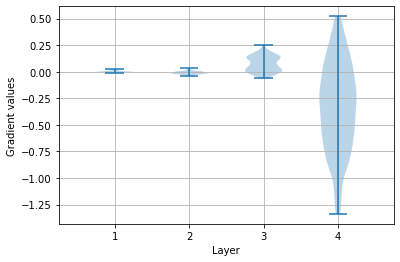

In [10]:
#model = build_model(tf.keras.activations.sigmoid)
model_sig = build_model(my_sigmoid)

from week10 import plot_grad
fig = plot_grad(model_sig)

**Answer:**
The size of the gradient goes towards zero as we move back through the layers. Should not be suprising as we are using a naive initialization and a saturating activation function.

### Better activation functions, tanh
#### Exercise 2.3) Can we solve the problems by using the tanh activation function? why? why not?

**Answer:**

The tanh function is zero centered giving outputs that can be negative. This opens up directions in our optimization space not available if we use the sigmoid function.

The tanh function still saturates at the extremes, so we still expect to see the gradients go towards zero.

#### Exercise 2.4)
Create a model using the tanh activation function and plot the gradients again. Comment on the result, and how it differs from the sigmoid case.

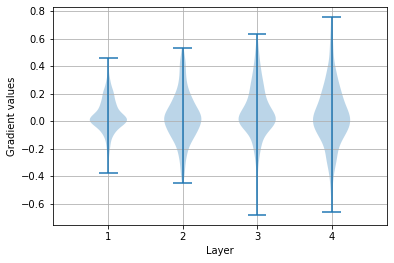

In [11]:
model_tanh = build_model(tf.keras.activations.tanh)

fig = plot_grad(model_tanh)

**Answer:**
The gradient propagates much better backwards in the layers. Still the gradient tends toward zero, but the problem is less severe compared to the sigmoid(logistic) activation function.

### Better activation functions, ReLU
The last activation function we are going to take a look at is the Rectified Linear Unit. This function is very different from the sigmoid and the tanh.

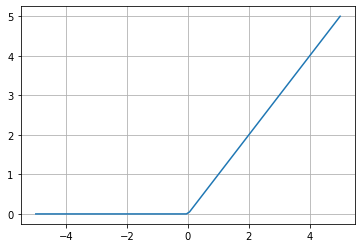

In [12]:
x = np.linspace(-5, 5, 100)
a = tf.keras.activations.relu(x)

fig, ax = plt.subplots()
ax.plot(x, a)
ax.grid()

This function is defined as

$$    f(x)= 
\begin{cases}
    0, & \text{if } x < 0\\
    x, & \text{otherwise}
\end{cases}$$

#### Exercise 2.5)
Can this activation function solve some of our problems?

**Answer:**
The gradient of this activation function does not saturate. The gradient is either zero for values below zero, or one for values above.

However, this function is not zero centered. so we do get issues with directions in the optimization space being unavailable.

#### Exercise 2.6)
As before, build a new model with this activation function and comment on the gradients.

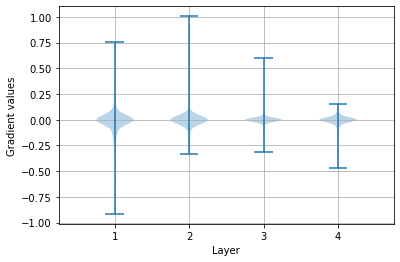

In [13]:
model_relu = build_model(tf.keras.activations.relu)
                    
fig = plot_grad(model_relu)

**Answer:** The gradient does not vanish, but are clustered close to zero.

#### Dead neurons
The ReLU activation function has the problem that the sigmoid and tanh functions do not have. During training we can end up in a situation where the input to the activation function in a node is always less than zero. In this case the gradient going back through that node will ALWAYS be zero, i.e the node "dies" and does no longer take part in training.

Other activation functions have been proposed to deal with this, from the simple Leaky-ReLU to the more interesting SELU. We will not explore these here, but when you are training your own models they are worth taking a look at.

### Initializing weights
Before we start training a neural network we must initialize the weights and biases of the network. There are several ways we can do this.

#### Exercise 2.7) Random uniform initialization
Imagine you are going to train a network with *many* nodes in the hidden layers using $\tanh$ as an activation function. You decide to initialize the weights of the network using a random uniform distribution in the range [-1, 1]. Can you think of any issues with this approach?

**hint:** What happens to the sum inside the activation function as the number of neurons in the previous layer increase?

**Answer:**
The activation of a neuron is on the form (ignoring bias)

$$\tanh\left(\sum_{\forall i} x_{i}w_{i}\right)$$

Variance of sum assuming independent variables($x_{i}$):

$$\text{Var}\left(\sum_{\forall i} x_{i}w_{i}\right) = \sum_{\forall i} \text{Var}\big(x_{i}w_{i}\big)$$

For the gradient of this activation to to not vanish, the term inside the $\tanh$ must be "close" to zero. But as the number of neurons increase the variance of the sum also increase, meaning that it's likely that we get an activation in the saturated region of the function.

One way to avoid this is to make the initialization depend on the number of neurons/weights.

#### Glorot normal initialization
Glorot initialization is a scheme where the size of the intitial weights depends on the number of neurons/weights in a layer. In this variant the weights are initialized as samples from a normal distribution.

$$W_l \sim \mathcal{N}(\mu=0, \sigma_l)$$

And $\sigma_l$ is on the form

$$\sigma_l = \sqrt{\frac{2}{n_l + n_{l+1}}}$$

Where $n_i$ is the number of neurons in layer $i$. The weight matrix $W_l$ is of size $n_l\times n_{l+1}$.

As the number of neurons and weights **increase**, the "range" of the initial values **decrease** so that the activations are likely to stay in the center range of the activation function where the gradient is large. The expression for $\sigma$ has a theoretical underpinning that we won't look at here, but if interested you can check out the [paper by Xavier Glorot and Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi). In it, they use a uniform distribution as an example. But the results are general for any kind of (reasonable) distribution.

#### Exercise 2.8)
Define a new function `build_model_glorot()`, that uses a glorot normal initialization in the layers of the model. You can copy and adapt the function you implemented in exercise 1.4

The docs for the keras Glorot normal initializer can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal?version=stable).

In [14]:
def build_model_glorot(activation):
    """
    Return a sequential model.
    
    Parameters
    ----------
    activation : function
        Function from tf.keras.activations, or my_sigmoid from earlier in the exercises.
    
    Returns
    -------
    model : tf-keras.Sequential
        Keras model.
    """
    init = tf.keras.initializers.GlorotNormal(seed=100) # Use this initialiser for all the layers.
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(2, input_shape=(2,), activation=activation,
                                    kernel_initializer=init))
    
    model.add(tf.keras.layers.Dense(2, activation=activation,
                                    kernel_initializer=init))
    
    model.add(tf.keras.layers.Dense(2, activation=activation,
                                    kernel_initializer=init))
    
    model.add(tf.keras.layers.Dense(2, kernel_initializer=init))
    
    return model

### Gradients with better initialization

#### Sigmoid
Let's take a look at the gradients when we are using a sigmoid activation function and the Glorot normal intiialization.

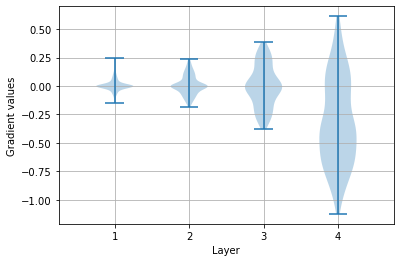

In [15]:
model2_sig = build_model_glorot(tf.keras.activations.sigmoid)
                    
fig = plot_grad(model2_sig)

Compare this to the figure from exercise 2.2, Notice the scale on the y-axis.

**Answer:**
We can see a marked improvement in the backpropagation of the gradients.

#### tanh
Now compare the tanh activation function model.

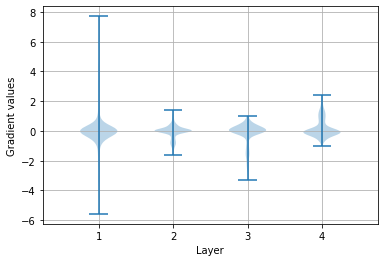

In [16]:
model2_tanh = build_model_glorot(tf.keras.activations.tanh)
                    
fig = plot_grad(model2_tanh)

**Answer:**
The scale of the activations has increased, And the graident does not seem to vanish.

#### ReLU
Finally, compare a new ReLU model.

In [ ]:
model2_relu = build_model_glorot(tf.keras.activations.relu)
                    
fig = plot_grad(model2_relu)

**Answer:**
The scale of the gradients have increased a lot.

## Summary

### Deep Learning Frameworks
In this exercise we have taken a look at the TensorFlow framework. A deep learning framework takes a lot of the pain out of creating complex models, and allows for quick development of performant code. In the third mandatory we will continue our exploration of tensorflow.

### Vanishing Gradient
Two ways to reduce the problem of vanishing gradients are to use a suitable activation function and a initialization scheme.

The sigmoid(logistic) function has a few problems that we can improve upon with other activation functions, and a proper initialization of the weights can make a huge difference.

We have only scratched the surface of possible activation functions and initializers. And there are also many other techniques that are employed to speed up training of neural networks, but these are left for later courses.